# 변수 형식 처리 및 파생변수 생성

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 형식 변환 및 파생변수 생성
<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.

<br>
<hr>
<br>


## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거 가능  
변수를 선택하듯 **=**을 활용해서 변수를 추가하거나 업데이트 가능

### 1.1. 변수 수정 및 추가

In [1]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame({'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')})
df_own

,FIRST,SECOND,THIRD
0,A,7,2023-01-07
1,B,6,2023-01-14
2,C,5,2023-01-21
3,D,8,2023-01-28


In [2]:
# 변수 형식 확인
df_own.dtypes

FIRST             object
SECOND             int64
THIRD     datetime64[ns]
dtype: object

In [3]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

0    7
1    6
2    5
3    8
Name: SECOND, dtype: int64

In [4]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,0
1,B,6,2023-01-14,0
2,C,5,2023-01-21,0
3,D,8,2023-01-28,0


In [5]:
# =을 활용한 업데이트
df_own['FOURTH'] = df_own['SECOND'] + 1
df_own

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,8
1,B,6,2023-01-14,7
2,C,5,2023-01-21,6
3,D,8,2023-01-28,9


In [6]:
# .assign()도 활용 가능
df_own.assign(FOURTH = df_own['SECOND'] + 1)

,FIRST,SECOND,THIRD,FOURTH
0,A,7,2023-01-07,8
1,B,6,2023-01-14,7
2,C,5,2023-01-21,6
3,D,8,2023-01-28,9


<br>

pandas의 *dt.weekday*를 활용하여 날짜시간 변수에서 날짜 요소를 추출
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [7]:
# pandas의 dt.weekday 활용
    ## ['THIRD'] 대신 .THIRD 활용가능
df_own['THIRD'].dt.weekday

0    5
1    5
2    5
3    5
Name: THIRD, dtype: int64

In [8]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY
0,A,7,2023-01-07,8,5
1,B,6,2023-01-14,7,5
2,C,5,2023-01-21,6,5
3,D,8,2023-01-28,9,5


<br>

### 1.2.  변수 제거

*drop()*은 **index**와 **columns**를 활용하여 관측치와 변수를 제거  
`axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있음

In [9]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수

,FIRST,SECOND,THIRD,WEEKDAY
0,A,7,2023-01-07,5
1,B,6,2023-01-14,5
2,C,5,2023-01-21,5
3,D,8,2023-01-28,5


In [10]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])
  

,FIRST,SECOND,THIRD,WEEKDAY
0,A,7,2023-01-07,5
1,B,6,2023-01-14,5
2,C,5,2023-01-21,5
3,D,8,2023-01-28,5


In [11]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

,FIRST,SECOND,THIRD,FOURTH,WEEKDAY
0,A,7,2023-01-07,8,5
1,B,6,2023-01-14,7,5
2,C,5,2023-01-21,6,5
3,D,8,2023-01-28,9,5


In [12]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

,FIRST,SECOND,THIRD,WEEKDAY
0,A,7,2023-01-07,5
1,B,6,2023-01-14,5
2,C,5,2023-01-21,5
3,D,8,2023-01-28,5


In [13]:
# 리스트를 활용한 복수 인덱스 제거
df_own = df_own.drop([0,3], axis=0)
df_own

,FIRST,SECOND,THIRD,WEEKDAY
1,B,6,2023-01-14,5
2,C,5,2023-01-21,5


<br>

### 1.3. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()*을 활용  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결

In [14]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

,var1,var2,THIRD,WEEKDAY
1,B,6,2023-01-14,5
2,C,5,2023-01-21,5


<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'sum'을 **df_sp**에 추가
2. 'math score', 'reading score', 'writing score' 중 한과목이라도 40보다 작은지 확인하고 변수 'fail_yn' 추가
3. 2.의 'fail_yn'을 활용해서 세 점수 중 하나라도 40점 미만인 학생 선택
4. 변수 'sum'의 이름을 'total'로 변경
5. 변수 'fail_yn'을 **df_sp**에서 제거하고 원본 데이터 업데이트 

In [15]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df_sp['sum'] = df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [17]:
# 2. 참고
cond_fail = (df_sp['math score']<40) | (df_sp['reading score']<40) | (df_sp['writing score']<40)
df_sp['fail_yn'] = cond_fail
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum,fail_yn
0,female,group B,bachelor's degree,standard,none,72,72,74,218,False
1,female,group C,some college,standard,completed,69,90,88,247,False
2,female,group B,master's degree,standard,none,90,95,93,278,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,False
4,male,group C,some college,standard,none,76,78,75,229,False
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,False
996,male,group C,high school,free/reduced,none,62,55,55,172,False
997,female,group C,high school,free/reduced,completed,59,71,65,195,False
998,female,group D,some college,standard,completed,68,78,77,223,False


In [18]:
df_sp[cond_fail]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum,fail_yn
7,male,group B,some college,free/reduced,none,40,43,39,122,True
9,female,group B,high school,free/reduced,none,38,60,50,148,True
17,female,group B,some high school,free/reduced,none,18,32,28,78,True
33,male,group D,some college,standard,none,40,42,38,120,True
55,female,group C,high school,free/reduced,none,33,41,43,117,True
59,female,group C,some high school,free/reduced,none,0,17,10,27,True
61,male,group A,some high school,free/reduced,none,39,39,34,112,True
66,male,group D,some high school,free/reduced,none,45,37,37,119,True
69,female,group C,associate's degree,standard,none,39,64,57,160,True
75,male,group B,associate's degree,free/reduced,none,44,41,38,123,True


In [19]:
df_sp.rename(columns={'sum':'total'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,fail_yn
0,female,group B,bachelor's degree,standard,none,72,72,74,218,False
1,female,group C,some college,standard,completed,69,90,88,247,False
2,female,group B,master's degree,standard,none,90,95,93,278,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,False
4,male,group C,some college,standard,none,76,78,75,229,False
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,False
996,male,group C,high school,free/reduced,none,62,55,55,172,False
997,female,group C,high school,free/reduced,completed,59,71,65,195,False
998,female,group D,some college,standard,completed,68,78,77,223,False


In [20]:
df_sp = df_sp.drop('fail_yn', axis=1)
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


#### 참고
한번에 비교 연산을 하거나 DataFrame의 sum()을 활용 가능

In [21]:
df_sp.select_dtypes('number') <= 40

,math score,reading score,writing score,sum
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [22]:
# 하나라도 True인 것 찾기
(df_sp.select_dtypes('number') <= 40).any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [23]:
# 변수별로 40점 미만 학생수 계산하기
(df_sp.select_dtypes('number') <= 40).sum(axis=0)

math score       50
reading score    27
writing score    35
sum               1
dtype: int64

In [24]:
# 관측치별로 40점 미만 과목수 계산하기
(df_sp.select_dtypes('number') <= 40).sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64

In [25]:
(df_sp.select_dtypes('number') <= 40).sum(axis=1).value_counts()

0    939
1     28
3     17
2     15
4      1
dtype: int64

In [30]:
df_sp.filter(regex='score').std(axis=1)

0       1.154701
1      11.590226
2       2.516611
3       6.806859
4       1.527525
         ...    
995     5.567764
996     4.041452
997     6.000000
998     5.507571
999     5.196152
Length: 1000, dtype: float64

<br>
<hr>
<br>

## 2. 변수 형식 변환 및 파생변수 생성

분석과정에서 변수의 형식을 바꾸거나 기존 변수를 활용한 파생변수 생성 가능  



### 2.1. 변수 형식의 확인/변환
**DataFrame**에서는 아래와 같은 형식의 Seires를 활용  


+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes*를 활용하여 변수 형식을 확인  
*.astype()*을 활용해서 변수 형식을 변환 



In [31]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
# 변수 형식 확인
df_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [33]:
# children을 float으로 변환
df_ins['children'].astype('float')

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

In [35]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.dtypes

age           int64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [37]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


In [38]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [40]:
df_ins['smoker'].astype('string')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: string

<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. .dtypes로 형식 확인하고 .nunique()로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [39]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head(1)

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93


In [41]:
df_pr['Diff'] = df_pr['Pulse2'] - df_pr['Pulse1']
df_pr

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year,Diff
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93,2.0
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93,68.0
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93,80.0
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93,2.0
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
105,93,27.0,19,2,2,2,3,2,119.0,120.0,98,1.0
106,161,43.0,19,2,2,2,3,2,90.0,89.0,98,-1.0
107,182,60.0,22,1,2,1,3,2,86.0,84.0,98,-2.0
108,170,65.0,18,1,2,1,1,2,69.0,64.0,98,-5.0


In [42]:
df_pr.dtypes

Height        int64
Weight      float64
Age           int64
Gender        int64
Smokes        int64
Alcohol       int64
Exercise      int64
Ran           int64
Pulse1      float64
Pulse2      float64
Year          int64
Diff        float64
dtype: object

In [43]:
df_pr.nunique()

Height      41
Weight      51
Age         13
Gender       2
Smokes       2
Alcohol      2
Exercise     3
Ran          2
Pulse1      38
Pulse2      54
Year         5
Diff        53
dtype: int64

In [45]:
cat_vars = ['Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran']
df_pr[cat_vars] = df_pr[cat_vars].astype('category')
df_pr.dtypes

Height         int64
Weight       float64
Age            int64
Gender      category
Smokes      category
Alcohol     category
Exercise    category
Ran         category
Pulse1       float64
Pulse2       float64
Year           int64
Diff         float64
dtype: object

In [48]:
df_pr.groupby(['Ran', 'Smokes', 'Alcohol'], as_index=False)['Diff'].mean()

,Ran,Smokes,Alcohol,Diff
0,1,1,1,47.666667
1,1,1,2,NaN
2,1,2,1,50.642857
3,1,2,2,53.533333
4,2,1,1,-2.500000
5,2,1,2,-1.000000
6,2,2,1,-0.666667
7,2,2,2,-1.040000


In [50]:
df_pr.groupby(['Ran', 'Smokes', 'Alcohol'], as_index=True)['Diff'].agg(['mean', 'size', 'std'])

mean  size        std
Ran Smokes Alcohol                            
1   1      1        47.666667     3  13.650397
           2              NaN     0        NaN
    2      1        50.642857    28  20.383752
           2        53.533333    15  24.345333
2   1      1        -2.500000     6   4.460942
           2        -1.000000     2   4.242641
    2      1        -0.666667    31   4.146734
           2        -1.040000    25   3.656957

<br>

### 2.2. 수치형 변수의 구간화

수치형 변수는 *cut()* 이나 *qcut()* 으로 구간화 가능  


+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

<br>

*cut()*을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있습니다. 

In [51]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

0        (13651.585, 19916.44]
1         (1059.225, 7386.729]
2         (1059.225, 7386.729]
3        (19916.44, 26181.296]
4         (1059.225, 7386.729]
                 ...          
1333     (7386.729, 13651.585]
1334      (1059.225, 7386.729]
1335      (1059.225, 7386.729]
1336      (1059.225, 7386.729]
1337    (26181.296, 32446.151]
Name: charges, Length: 1338, dtype: category
Categories (10, interval[float64, right]): [(1059.225, 7386.729] < (7386.729, 13651.585] < (13651.585, 19916.44] < (19916.44, 26181.296] ... (38711.006, 44975.862] < (44975.862, 51240.717] < (51240.717, 57505.573] < (57505.573, 63770.428]]

In [57]:
charges_breaks = [0, 5000, 10000, 16884.92400, 20000, 99999999999999]

In [56]:
df_ins['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False)

0               [16884.924, 20000.0)
1                      [0.0, 5000.0)
2                      [0.0, 5000.0)
3       [20000.0, 99999999999999.02)
4                      [0.0, 5000.0)
                    ...             
1333            [10000.0, 16884.924)
1334                   [0.0, 5000.0)
1335                   [0.0, 5000.0)
1336                   [0.0, 5000.0)
1337    [20000.0, 99999999999999.02)
Name: charges, Length: 1338, dtype: category
Categories (5, interval[float64, left]): [[0.0, 5000.0) < [5000.0, 10000.0) < [10000.0, 16884.924) < [16884.924, 20000.0) < [20000.0, 99999999999999.02)]

In [60]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

,age,sex,bmi,children,smoker,region,charges,charges_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,2
1,18,male,33.770,1.0,no,southeast,1725.55230,0
2,28,male,33.000,3.0,no,southeast,4449.46200,0
3,33,male,22.705,0.0,no,northwest,21984.47061,3
4,32,male,28.880,0.0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,1
1334,18,female,31.920,0.0,no,northeast,2205.98080,0
1335,18,female,36.850,0.0,no,southeast,1629.83350,0
1336,21,female,25.800,0.0,no,southwest,2007.94500,0


In [61]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

0    536
1    398
2    129
3     86
5     59
6     57
4     35
7     32
9      4
8      2
Name: charges_grp, dtype: int64

In [64]:
# qcut()을 활용한 등비율 구간화
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(10, 0, -1))
df_ins

,age,sex,bmi,children,smoker,region,charges,charges_grp,charges_grp2
0,19,female,27.900,0.0,yes,southwest,16884.92400,2,3
1,18,male,33.770,1.0,no,southeast,1725.55230,0,10
2,28,male,33.000,3.0,no,southeast,4449.46200,0,8
3,33,male,22.705,0.0,no,northwest,21984.47061,3,2
4,32,male,28.880,0.0,no,northwest,3866.85520,0,9
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,1,5
1334,18,female,31.920,0.0,no,northeast,2205.98080,0,10
1335,18,female,36.850,0.0,no,southeast,1629.83350,0,10
1336,21,female,25.800,0.0,no,southwest,2007.94500,0,10


In [63]:
df_ins['charges_grp2'].value_counts()

1     134
2     134
3     134
5     134
6     134
8     134
9     134
10    134
4     133
7     133
Name: charges_grp2, dtype: int64

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. crosstab()을 활용해서 'parental level of education'과 3.의 그룹 변수로 교차표 생성/열지도 시각화

In [ ]:
df_sp.head()

In [69]:
df_sp.describe()

,math score,reading score,writing score,sum
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [71]:
df_sp[df_sp['math score'] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum,r_grp
59,female,group C,some high school,free/reduced,none,0,17,10,27,"(16.999, 57.0]"


In [75]:
df_sp['m_grp'] =   pd.cut(df_sp['math score'], bins=[-1,20,40,60,80,100])
df_sp.loc[55:60]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum,r_grp,m_grp
55,female,group C,high school,free/reduced,none,33,41,43,117,"(16.999, 57.0]","(20, 40]"
56,female,group E,associate's degree,standard,completed,82,85,86,253,"(82.0, 100.0]","(80, 100]"
57,male,group D,associate's degree,standard,none,52,55,49,156,"(16.999, 57.0]","(40, 60]"
58,male,group D,some college,standard,completed,58,59,58,175,"(57.0, 66.0]","(40, 60]"
59,female,group C,some high school,free/reduced,none,0,17,10,27,"(16.999, 57.0]","(-1, 20]"
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72,225,"(66.0, 74.0]","(60, 80]"


In [66]:
pd.cut(df_sp['reading score'], bins=5)

0       (66.8, 83.4]
1      (83.4, 100.0]
2      (83.4, 100.0]
3       (50.2, 66.8]
4       (66.8, 83.4]
           ...      
995    (83.4, 100.0]
996     (50.2, 66.8]
997     (66.8, 83.4]
998     (66.8, 83.4]
999    (83.4, 100.0]
Name: reading score, Length: 1000, dtype: category
Categories (5, interval[float64, right]): [(16.917, 33.6] < (33.6, 50.2] < (50.2, 66.8] < (66.8, 83.4] < (83.4, 100.0]]

In [67]:
df_sp['r_grp'] = pd.qcut(df_sp['reading score'], q=5)
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum,r_grp
0,female,group B,bachelor's degree,standard,none,72,72,74,218,"(66.0, 74.0]"
1,female,group C,some college,standard,completed,69,90,88,247,"(82.0, 100.0]"
2,female,group B,master's degree,standard,none,90,95,93,278,"(82.0, 100.0]"
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,"(16.999, 57.0]"
4,male,group C,some college,standard,none,76,78,75,229,"(74.0, 82.0]"
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,"(82.0, 100.0]"
996,male,group C,high school,free/reduced,none,62,55,55,172,"(16.999, 57.0]"
997,female,group C,high school,free/reduced,completed,59,71,65,195,"(66.0, 74.0]"
998,female,group D,some college,standard,completed,68,78,77,223,"(74.0, 82.0]"


<Axes: xlabel='parental level of education', ylabel='r_grp'>

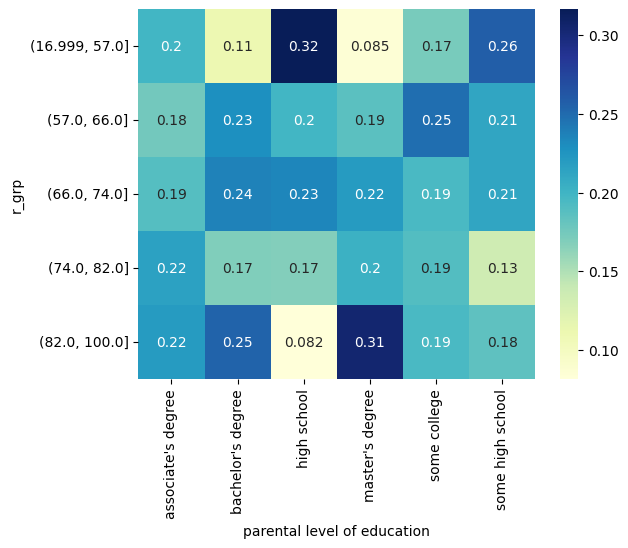

In [76]:
import seaborn as sns

tab = pd.crosstab(df_sp['r_grp'], df_sp['parental level of education'], normalize='columns')
sns.heatmap(tab, cmap='YlGnBu', annot=True)

### 2.3. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화 가능

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [80]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046
...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579
115602,2022-07-31,8,2827,모란,승차,2320
115603,2022-07-31,8,2827,모란,하차,2037
115604,2022-07-31,8,2828,남위례,승차,2126


In [82]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway.dtypes

날짜      datetime64[ns]
호선            category
역번호              int64
역명              object
구분              object
이용객수             int64
dtype: object

In [83]:
# 요일 변수 생성
df_subway['요일'] = df_subway['날짜'].dt.weekday
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일
0,2022-01-01,1,150,서울역,승차,18525,5
1,2022-01-01,1,150,서울역,하차,17087,5
2,2022-01-01,1,151,시청,승차,5660,5
3,2022-01-01,1,151,시청,하차,5063,5
4,2022-01-01,1,152,종각,승차,10046,5
...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6
115602,2022-07-31,8,2827,모란,승차,2320,6
115603,2022-07-31,8,2827,모란,하차,2037,6
115604,2022-07-31,8,2828,남위례,승차,2126,6


In [84]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일,월
0,2022-01-01,1,150,서울역,승차,18525,5,1
1,2022-01-01,1,150,서울역,하차,17087,5,1
2,2022-01-01,1,151,시청,승차,5660,5,1
3,2022-01-01,1,151,시청,하차,5063,5,1
4,2022-01-01,1,152,종각,승차,10046,5,1
...,...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6,7
115602,2022-07-31,8,2827,모란,승차,2320,6,7
115603,2022-07-31,8,2827,모란,하차,2037,6,7
115604,2022-07-31,8,2828,남위례,승차,2126,6,7


In [85]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
agg

,날짜,호선,이용객수
0,2022-01-01,1,173736
1,2022-01-01,2,975559
2,2022-01-01,3,356262
3,2022-01-01,4,386622
4,2022-01-01,5,461184
...,...,...,...
1691,2022-07-31,4,492378
1692,2022-07-31,5,554841
1693,2022-07-31,6,327457
1694,2022-07-31,7,496649


<Axes: xlabel='날짜', ylabel='이용객수'>

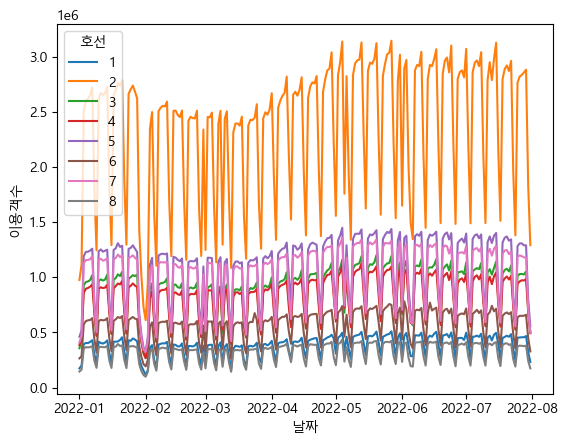

In [86]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [87]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [98]:
df_accident['발생년월일시'] = pd.to_datetime(df_accident['발생년월일시'] )
df_accident['월'] = df_accident['발생년월일시'].dt.month
df_accident['시'] = df_accident['발생년월일시'].dt.hour
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,월,시
0,2021,2021-01-01 03:00:00,야,금,1,3,0,3,0,경북,...,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,1,3
1,2021,2021-01-01 09:00:00,주,금,1,0,0,0,0,충남,...,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,1,9
2,2021,2021-01-01 15:00:00,주,금,1,0,0,0,0,강원,...,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,1,15
3,2021,2021-01-01 19:00:00,야,금,1,0,0,0,0,전남,...,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,1,19
4,2021,2021-01-01 21:00:00,야,금,1,0,0,0,0,경기,...,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00:00,주,금,1,0,0,0,0,경북,...,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434,12,16
2812,2021,2021-12-31 17:00:00,주,금,1,0,0,0,0,제주,...,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699,12,17
2813,2021,2021-12-31 18:00:00,야,금,1,0,0,0,0,강원,...,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465,12,18
2814,2021,2021-12-31 19:00:00,야,금,1,0,0,0,0,경북,...,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521,12,19


In [101]:
cond_month = df_accident['월'].between(7,8)
cond_hour = df_accident['시'].between(1,5)

df_accident[cond_month & cond_hour].shape[0]

74

In [107]:
pt = df_accident.pivot_table(index='월', columns='시', values='사망자수', aggfunc='sum')
pt.loc[7:8, 1:5].sum().sum()

78.0

<Axes: xlabel='시', ylabel='월'>

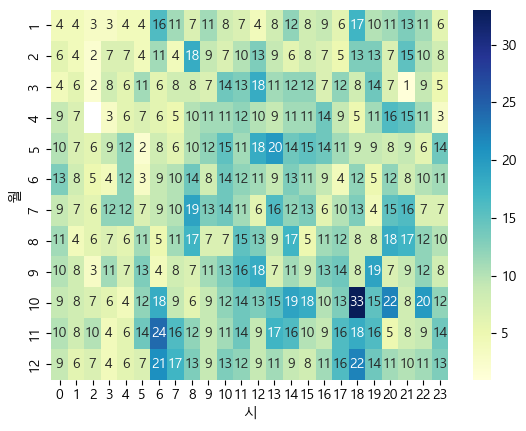

In [108]:
sns.heatmap(pt, cmap='YlGnBu', annot=True)

In [109]:
df_accident.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도', '월', '시'],
      dtype='object')

사망자수


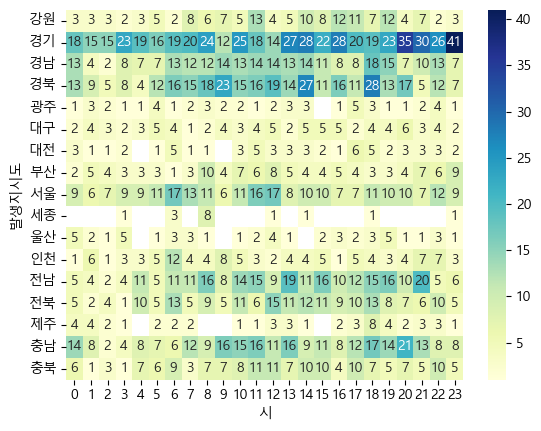

부상자수


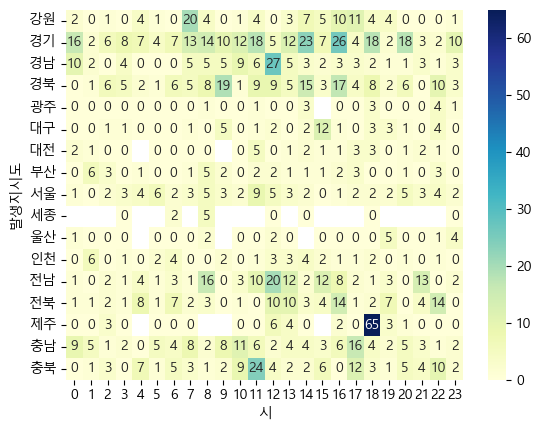

중상자수


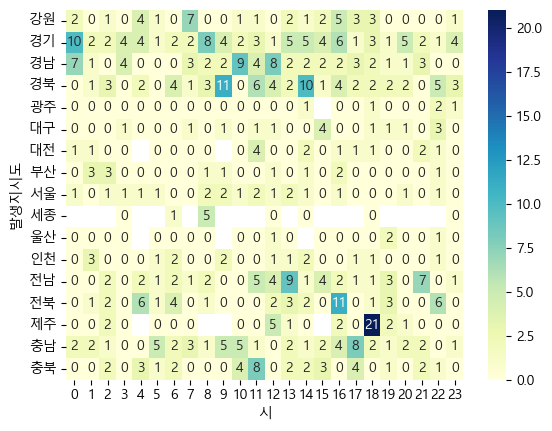

경상자수


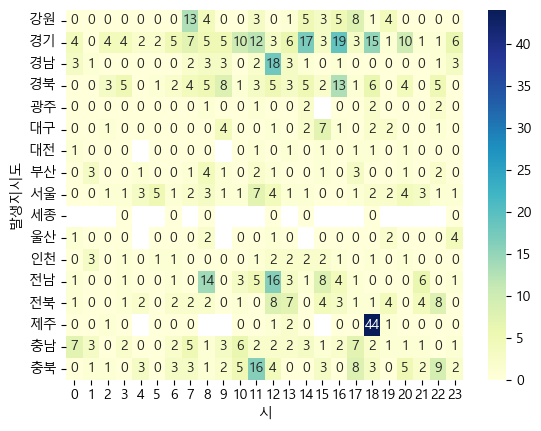

In [111]:
for col in ['사망자수', '부상자수', '중상자수', '경상자수']:
    print(col)
    pt = df_accident.pivot_table(index='발생지시도', columns='시', values=col, aggfunc='sum')
    sns.heatmap(pt, cmap='YlGnBu', annot=True)
    plt.show()

#### End of script